In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('Company_data.csv')

In [14]:
df.shape

(400, 11)

In [15]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [16]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [18]:
m=df['Sales'].mean()

In [20]:
df['High']=['Yes' if x>m else 'No' for x in df['Sales']]

In [21]:
df.shape

(400, 12)

In [22]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y=df['High']

In [25]:
x=df.drop('High',axis=1)

In [37]:
x1=x.drop('Sales',axis=1)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=101)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((300, 10), (100, 10), (300,), (100,))

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model=DecisionTreeClassifier()

In [42]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [43]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
model.score(x_test,y_test)#testing accuracy is 77%

0.77

In [45]:
model.score(x_train,y_train)

1.0

In [46]:
y_pred=model.predict(x_test)

In [47]:
pd.crosstab(y_pred,y_test)

High,No,Yes
row_0,,
No,40,14
Yes,9,37


# Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf=RandomForestClassifier(n_estimators=40,max_depth=2)

In [51]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
rf.score(x_train,y_train)

0.7933333333333333

In [53]:
rf.score(x_test,y_test)

0.76

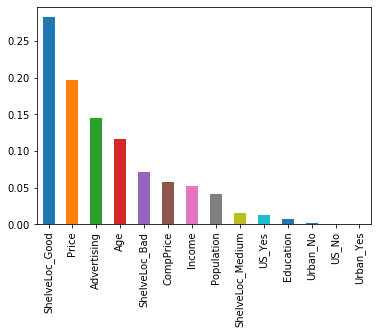

In [64]:
pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False).plot(kind='bar')

In [65]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [66]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
